### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, Markdown

# Leemos los archivos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregamos una columna indicando la tienda de origen
tienda1['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

# Unimos todos los datos en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
#tienda1.head()
df

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


#1. Análisis de facturación



In [2]:
# 1. FACTURACIÓN TOTAL POR TIENDA

# Función para calcular facturación total
def calcular_facturacion(data):
    # Multiplica precio * cantidad vendida
    return (data["Precio"] * data["Cantidad de cuotas"]).sum()

# Calculamos la facturación para cada tienda
facturaciones = {
    "Tienda 1": calcular_facturacion(tienda1),
    "Tienda 2": calcular_facturacion(tienda2),
    "Tienda 3": calcular_facturacion(tienda3),
    "Tienda 4": calcular_facturacion(tienda4),
}

for tienda, valor in facturaciones.items():
    print(f"{tienda} - Facturación Total: ${valor:,.2f}")

# Facturación total de todas las tiendas
facturacion_total = sum(facturaciones.values())
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:,.2f}\n")

Tienda 1 - Facturación Total: $3,422,717,700.00
Tienda 2 - Facturación Total: $3,337,189,200.00
Tienda 3 - Facturación Total: $3,243,816,900.00
Tienda 4 - Facturación Total: $3,098,827,200.00

Facturación total de todas las tiendas: $13,102,551,000.00



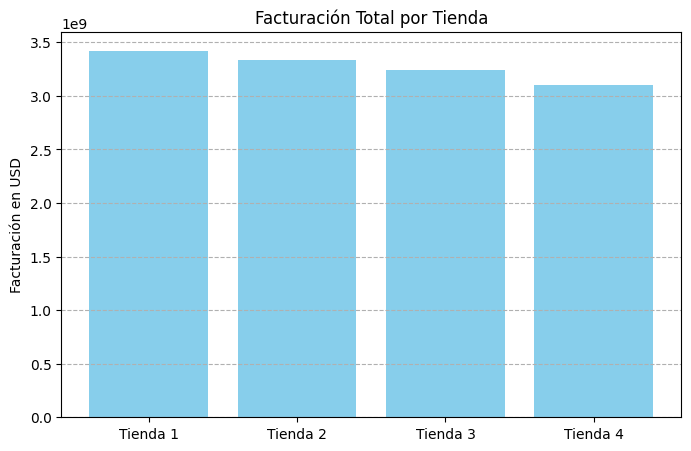

In [3]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(facturaciones.keys(), facturaciones.values(), color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación en USD')
plt.grid(axis='y', linestyle='--')
plt.show()

# 2. Ventas por categoría

Resultados por tienda:

Tienda 1: Muebles - 1.446 cuotas
Tienda 2: Electrónicos - 1.333 cuotas
Tienda 3: Muebles - 1.408 cuotas
Tienda 4: Muebles - 1.392 cuotas


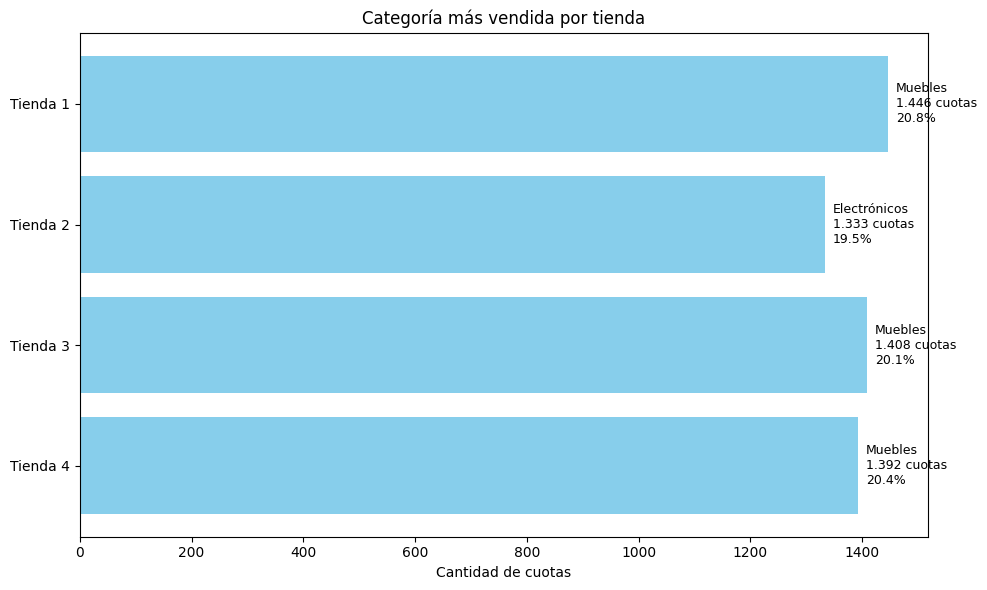

In [28]:
# Cálculo de ventas por categoría y tienda
ventas = df.groupby(["tienda", "Categoría del Producto"])["Cantidad de cuotas"].sum().reset_index()

# Obtener la categoría más vendida por tienda
top_categorias = ventas.sort_values("Cantidad de cuotas", ascending=False).groupby("tienda").head(1)

# Calcular el total por tienda para obtener porcentajes
total_por_tienda = ventas.groupby("tienda")["Cantidad de cuotas"].sum().reset_index()
top_categorias = top_categorias.merge(total_por_tienda, on="tienda", suffixes=('', '_total'))
top_categorias["Porcentaje"] = (top_categorias["Cantidad de cuotas"] / top_categorias["Cantidad de cuotas_total"] * 100).round(1)

# Ordenar por tienda
top_categorias = top_categorias.sort_values("tienda").reset_index(drop=True)

# Crear etiquetas para el gráfico
top_categorias["Etiqueta"] = (
    top_categorias["Categoría del Producto"] + "\n" +
    top_categorias["Cantidad de cuotas"].apply(lambda x: f"{int(x):,}".replace(",", ".")) + " cuotas\n" +
    top_categorias["Porcentaje"].astype(str) + "%"
)

print("Resultados por tienda:\n")
for _, fila in top_categorias.iterrows():
    cuotas_formateadas = f"{int(fila['Cantidad de cuotas']):,}".replace(",", ".")  # Formato con punto como miles
    print(f"{fila['tienda']}: {fila['Categoría del Producto']} - {cuotas_formateadas} cuotas")


# GRÁFICO DE BARRAS HORIZONTALES
plt.figure(figsize=(10, 6))
bars = plt.barh(top_categorias["tienda"], top_categorias["Cantidad de cuotas"], color='skyblue')

# Añadir etiquetas a cada barra
for bar, etiqueta in zip(bars, top_categorias["Etiqueta"]):
    plt.text(bar.get_width() + max(top_categorias["Cantidad de cuotas"]) * 0.01,
             bar.get_y() + bar.get_height() / 2,
             etiqueta, va='center', fontsize=9)

plt.xlabel("Cantidad de cuotas")
plt.title("Categoría más vendida por tienda")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# 3. Calificación promedio de la tienda


### Promedio de calificación de cada tienda:



Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


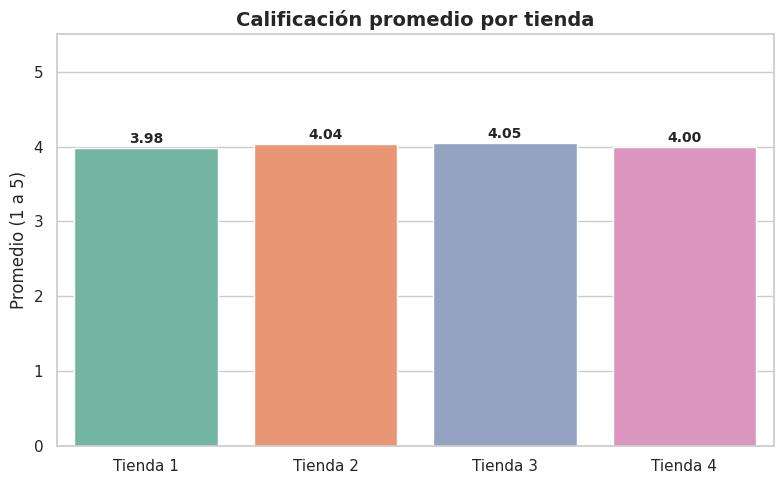

In [42]:
from IPython.display import display, HTML, Markdown

# Desactivar warnings innecesarios (como FutureWarning de Seaborn)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def calificacion_promedio(data):
    return data["Calificación"].mean()

def mostrar_calificacion_promedio(data, nombre_tienda):
    promedio = calificacion_promedio(data)
    print(f"{nombre_tienda} - Calificación promedio: {promedio:.2f}")
    return promedio

# Calcular promedios y almacenar resultados
display(Markdown("### Promedio de calificación de cada tienda:"))
resultados = []
print('\n')

for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    data_tienda = df[df['tienda'] == tienda]
    promedio = mostrar_calificacion_promedio(data_tienda, tienda)
    resultados.append({"Tienda": tienda, "Calificación promedio": promedio})

# Crear DataFrame de resultados
df_promedios = pd.DataFrame(resultados)
df_promedios = df_promedios.sort_values("Tienda", ascending=True)


# Configuración del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras (evita advertencias)
bars = sns.barplot(
    data=df_promedios,
    x="Tienda",
    y="Calificación promedio",
    palette="Set2"
)

# Añadir etiquetas numéricas sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Estética final
plt.ylim(0, 5.5)
plt.title("Calificación promedio por tienda", fontsize=14, fontweight='bold')
plt.ylabel("Promedio (1 a 5)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [30]:
def producto_mas_y_menos_vendido(data):
    ventas = data.groupby("Producto")["Cantidad de cuotas"].sum()
    mas_vendido = ventas.idxmax(), ventas.max()
    menos_vendido = ventas.idxmin(), ventas.min()
    return mas_vendido, menos_vendido

def mostrar_productos_extremos(data, nombre_tienda):
    mas_vendido, menos_vendido = producto_mas_y_menos_vendido(data)
    print(f"{nombre_tienda} - Producto más vendido  : {mas_vendido[0]} ({mas_vendido[1]:,} unidades)")
    print(f"{nombre_tienda} - Producto menos vendido: {menos_vendido[0]} ({menos_vendido[1]:,} unidades)")

for t in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    mostrar_productos_extremos(df[df['tienda'] == t], t)

Tienda 1 - Producto más vendido  : Secadora de ropa (214 unidades)
Tienda 1 - Producto menos vendido: Celular ABXY (78 unidades)
Tienda 2 - Producto más vendido  : Iniciando en programación (223 unidades)
Tienda 2 - Producto menos vendido: Mesa de comedor (89 unidades)
Tienda 3 - Producto más vendido  : Bicicleta (191 unidades)
Tienda 3 - Producto menos vendido: TV LED UHD 4K (94 unidades)
Tienda 4 - Producto más vendido  : Dashboards con Power BI (196 unidades)
Tienda 4 - Producto menos vendido: Armario (88 unidades)


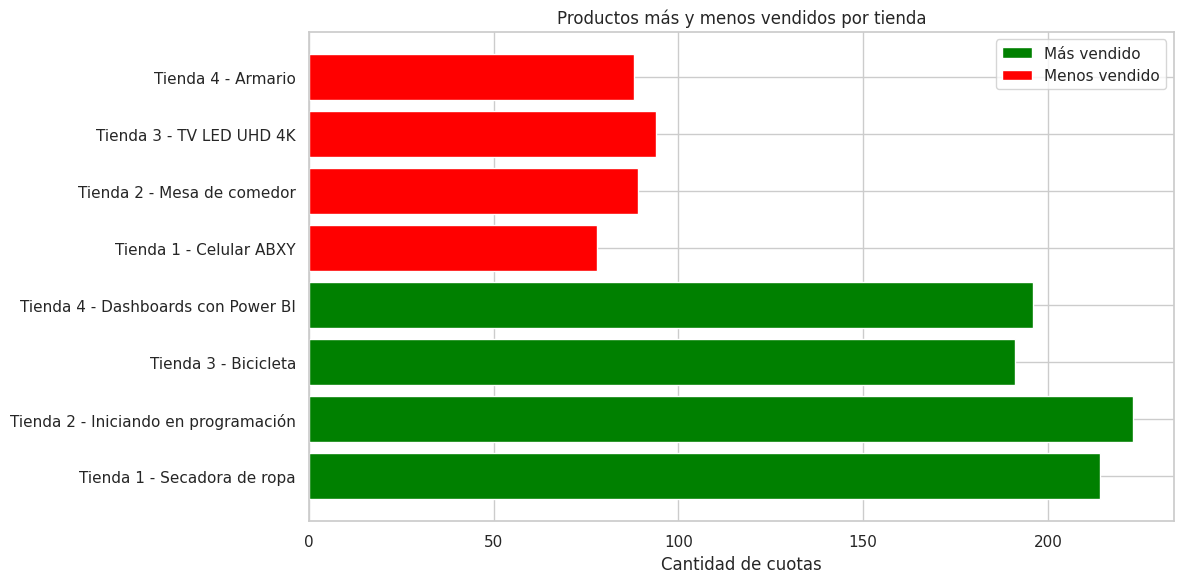

### Interpretación del grafico:

Tienda 1:
  🟢 Producto más vendido   : Secadora de ropa (214 cuotas)
  🔴 Producto menos vendido : Celular ABXY (78 cuotas)



### Interpretación del grafico:

Tienda 2:
  🟢 Producto más vendido   : Iniciando en programación (223 cuotas)
  🔴 Producto menos vendido : Mesa de comedor (89 cuotas)



### Interpretación del grafico:

Tienda 3:
  🟢 Producto más vendido   : Bicicleta (191 cuotas)
  🔴 Producto menos vendido : TV LED UHD 4K (94 cuotas)



### Interpretación del grafico:

Tienda 4:
  🟢 Producto más vendido   : Dashboards con Power BI (196 cuotas)
  🔴 Producto menos vendido : Armario (88 cuotas)



In [40]:
def producto_mas_y_menos_vendido(data):
    ventas = data.groupby("Producto")["Cantidad de cuotas"].sum()
    mas_vendido = ventas.idxmax(), ventas.max()
    menos_vendido = ventas.idxmin(), ventas.min()
    return mas_vendido, menos_vendido

# Lista para recopilar los datos
datos_extremos = []

# Lista de tiendas (ajústala según tu dataset)
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Recopilar datos por tienda
for t in tiendas:
    df_tienda = df[df['tienda'] == t]
    mas_vendido, menos_vendido = producto_mas_y_menos_vendido(df_tienda)
    datos_extremos.append({
        "tienda": t,
        "tipo": "Más vendido",
        "producto": mas_vendido[0],
        "cuotas": mas_vendido[1]
    })
    datos_extremos.append({
        "tienda": t,
        "tipo": "Menos vendido",
        "producto": menos_vendido[0],
        "cuotas": menos_vendido[1]
    })

# Convertir a DataFrame
df_extremos = pd.DataFrame(datos_extremos)

# Crear gráfico
plt.figure(figsize=(12, 6))
colors = {"Más vendido": "green", "Menos vendido": "red"}

for tipo in ["Más vendido", "Menos vendido"]:
    subset = df_extremos[df_extremos["tipo"] == tipo]
    plt.barh(subset["tienda"] + " - " + subset["producto"], subset["cuotas"],
             label=tipo, color=colors[tipo])

plt.xlabel("Cantidad de cuotas")
plt.title("Productos más y menos vendidos por tienda")
plt.legend()
plt.tight_layout()
plt.show()

# impresion en texto
# Ordenar por tienda y mostrar en consola
tiendas_ordenadas = sorted(df_extremos["tienda"].unique())

for tienda in tiendas_ordenadas:
    # Extraer la fila del producto más vendido
    fila_mas = df_extremos.query("tienda == @tienda and tipo == 'Más vendido'").iloc[0]

    # Extraer la fila del producto menos vendido
    fila_menos = df_extremos.query("tienda == @tienda and tipo == 'Menos vendido'").iloc[0]

    # Formatear cuotas con punto como separador de miles
    cuotas_mas = f"{fila_mas['cuotas']:,}".replace(",", ".")
    cuotas_menos = f"{fila_menos['cuotas']:,}".replace(",", ".")

    # Imprimir resultados
    display(Markdown("### Interpretación del grafico:"))
    print(f"{tienda}:")
    print(f"  🟢 Producto más vendido   : {fila_mas['producto']} ({cuotas_mas} cuotas)")
    print(f"  🔴 Producto menos vendido : {fila_menos['producto']} ({cuotas_menos} cuotas)\n")

# 5. Envío promedio por tienda

In [41]:
def costo_envio_promedio(data):
    return data["Costo de envío"].mean()

def mostrar_costo_envio_promedio(data, nombre_tienda):
    promedio = costo_envio_promedio(data)
    print(f"{nombre_tienda} - Costo de envío promedio: ${promedio:,.2f}")

for t in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    mostrar_costo_envio_promedio(df[df['tienda'] == t], t)

Tienda 1 - Costo de envío promedio: $26,018.61
Tienda 2 - Costo de envío promedio: $25,216.24
Tienda 3 - Costo de envío promedio: $24,805.68
Tienda 4 - Costo de envío promedio: $23,459.46
